# GENETIC ALGORITHM -A PROBLEM SOLVING IDEA FROM NATURE

## Introduction

There are many lessons we can learn from nature for getting the many available solutions for real life problems.
Initially, an algorithm is defined to be an exact well-explained regular approach that can be applied and systematically followed through to get a conclusion.
An algorithm that is structured based on a self-organized natural
process is mainly used to secure the different combinations of possibilities available to solve a problem.
A genetic algorithm is a good example of one such algorithm. It is based on the overall principle behind the preservation and inheritance of any gene (hereditary factor) related to any trait within a particular population.

## Basic Concept Behind The Algorithm
The fundamental reality of a population in the process of evolution that has been adopted within the genetic algorithm is--
Initially, the population of a single species of organism is present in a natural environment. Across different generations, fitter individuals have greater chances to survive and breed while weaker ones are eliminated from the population due to their inability to outlive tough circumstances faced by the population. However, few weak individuals that may or may not survive have to face difficult situations due to which the viable ones can take part in the process of breeding and increase diversity in the offspring. In the process of breeding, diversity is produced by creating different combinations of genes within offsprings by crossing over
between parental genes. Apart from crossing over, genetic mutations can create totally new changes which can result in significant uniqueness during the process of evolution.
While using the genetic algorithm, a set of all candidate solutions(members of a set of all possible solutions to a problem) to a problem is treated like a population. Each candidate solution may be regarded as a single individual or phenotype. The population is a set of candidate solutions to a problem which can be evolved towards better solutions. Each individual has a set of properties (genotype) which can be altered and modified by mutation.

In [1]:
from random import randint,random
from operator import add
from functools import reduce
import matplotlib.pyplot as plt

## This program illustrates the concept of genetic algorithms by evolving a
## solution for a simple, contrived problem. The approach is non-deterministic
## with each run of the program giving a different candidate solution.
## Summary: A population is a list of members and members are lists of
## attributes (analogous to genetic traits).  Depending on how the problem is
## modelled, each member represents a candidate solution with each element of
## the member array standing for a solution attribute.


The first step in the entire operation we'd carry out within the Python programming language is to import all the required functions into the program. 
The imported functions such as 'randint', 'add', 'reduce', and 'matplotlib' are used for processes such as picking random integers, addition of all numbers within a set, a single result output(by arithmetic methods) and plotting graphs respectively. 

## A Simple Condition Based on The Genetic Algorithm
In order to create a population, the first step would be to write a code to create a single member.
Each member is a set that has a definite number of 'traits'; all traits of a single member are diverse, randomly selected numbers lying evenly between the indicated minimum and maximum values. 
The imported function used to create a set of random integers within a definite range is 'randint'. 
The declared function 'member' within the program is used to carry out this entire process(creation of a single member).

In [16]:
"""
The defined function(makeMember)creates a set of numbers between 
numMin & numMax; each set is like a single member of a population.
""";

In [3]:
def makeMember(numLength, numMin, numMax):
	'''
	Creates a  list of numbers between numMin,numMax representing a single
	member of the population. The numbers are attributes of each member.
	'''
	return [randint(numMin,numMax) for x in range (numLength)]


The next step is the formation of a population: a diverse set of members, selected as mentioned above(the value of the first variable is equal to the number of members in a single population). 
The declared function to create a population with number of members equal to the value of the first variable is a 'population'.

In [4]:
def makePopulation(numCount,numLength,numMin,numMax):
	'''
	Create a population of numCount members each with numLength attributes
	between numMin and numMax. 
	'''
	return [makeMember(numLength,numMin,numMax) for x in range (numCount)]


In [15]:
"""
numCount: number of members in a single population
numLength: number of traits in a single member (i.e number of 
values in a single set)
numMin,numMax: the minimum & maximum values between which the 
values in each set lie
""";

### The Fitness of a member and Its Relevance in The Population
In order to find the quality of each member, the fitness of each member should be determined. 
Here, the quality of a member is inversely proportional to its value of fitness. So, the lower the fitness, the better is the
individual. 
The fitness is the absolute value of difference between the target mean and the mean of the values ('traits') of a single individual member whose fitness is to be evaluated. 
The 'reduce' function is used to independently add up all the values within each member and attribute the final value to a single variable called 'sumAttr'. 

In [5]:
def calcFitness(lstMember,valTarget):
	'''
	Calculates fitness of a population member.  We define it as absolute
	deviation of mean value of member attributes from a target value. The
	fitness function depends on the problem being modelled.
	'''
	sumAttr = reduce(add,lstMember,0)  # add all attribute values
	lenMember = len(lstMember)  
	mean = (sumAttr/lenMember * 1.0)  # calculate their mean
	return abs(valTarget-mean)  # Lower is 'fitter'


In [17]:
"""
The function (calcFitness) determines the fitness of each member
(an absolute value of difference between the mean of each set of 
numbers & the target mean); a member with lower fitness is better.
lstMember: the set of numbers whose mean is to be evaluated.
lenMember: the size of the set of attributes related to each member.
sumAttr: the sum of all attributes related to each member.
valTarget: the target mean we aim at.
""";

After confirming the fitness of each member of a population, the next declared function ('calcGrade')determines the average fitness of the population. As usual, the fitness values of all members are added and divided by the total number of members in a single population to obtain the value of mean.
[Note: the values of both mean and number of members in a population under the declared functions 'calcFitness' and 'calcGrade' respectively are multiplied by a decimal value (1.0) in order to prevent the final value returned by either function from being rounded off to the nearest whole number]

In [6]:
def calcGrade(lstPopulation,valTarget):
	'''
	Find average fitness of a population.
	'''
	# Add fitness values of each population member and calculate the average
	total = reduce(add,(calcFitness(x,valTarget) for x in lstPopulation),0)
	return total/(len(lstPopulation)*1.0)


The comments that depict commands(lines with syntax)have been hashed. The reason for the idle nature of the commands that had to be hashed is the absence of a constant target mean(variable:targmn). 
The target mean is an important, but uncertain aspect that is entirely based on the state of the considered population. It is quite changeable due to the stochasticity of the applications related to the Genetic Algorithm.

A separate set of parents is formed to which few members with comparitively higher fitness values are also added in order to maintain diversity. The process of crossing over is carried out in the end, before which it would be better to make any required changes ('mutations') in 'parental traits'. The point for a
'mutation' in a single individual is any random 'trait'. The value of the substitute lies within the range of the maximum and minimum values in the member or set of numbers.

In [11]:
def evolvePopulation(lstPop, valTarget, frac2retain=0.2, prob_select=0.05, prob_mutate=0.02):
	'''
	Evolve the population using analogies of natural selection and crosses
	in Genetics. 
	frac2retain: fraction of the fittest for the next generation, 
	prob_select: probability that a member of rest of the population 
	will go to the next generation and 
	prob_mutate: probability that individual members ready to breed for the next
	generation will undergo random mutation.
	'''
	lstPopFitness = [(calcFitness(x, valTarget), x) for x in lstPop]
	lstSortedPop = [x[1] for x in sorted(lstPopFitness)]    
	#Population with members in ascending order of fitness
	
	retain_length = int(len(lstSortedPop)*frac2retain)     
	#top X% members in the population
	lstParents = lstSortedPop[:retain_length]
				
	#other individuals are randomly added to promote genetic diversity
	for member in lstSortedPop[retain_length:]:
		if prob_select > random():
			lstParents.append(member)
												
	#mutate some individuals
	for member in lstParents:
		if prob_mutate > random():
			posit_mut = randint(0, len(member) - 1) #position to mutate
			member[posit_mut] = randint(min(member),max(member)) #mutated value
																			
	#crossover parents to create children
	numParents = len(lstParents)
	numChildrenNeeded = len(lstPop) - numParents
	lstTots = [] #array to hold the children
	
	while len(lstTots) < numChildrenNeeded:
		indMale = randint(0,numParents-1)
		indFemale = randint(0,numParents-1)
		if indMale != indFemale:  # Make sure two different parents cross.
			lstMaleMem = lstParents[indMale]
			lstFemaleMem = lstParents[indFemale]
			x_over = len(lstMaleMem)//2  # cross over point
			tot = lstMaleMem[:x_over] + lstFemaleMem[x_over:]
			lstTots.append(tot)
												
	lstParents.extend(lstTots)
	return lstParents  # The evolved population or parents for next gen.
	# This generation is mostly better than the previous one in terms of fitness.
    

One of the last unique steps that have been involved from biological processes is that of Evolution (function:evolvePopulation). It is an iterative process which mostly starts from a population of randomly generated individuals, with the population in each iteration called as a Generation.
Evolution consists of crossing over and mutations of parental traits, the changes which are passed on to or inherited by offsprings. The code ensures that the top 20% of individuals or members of the population with ideal fitness values ensure that the strongest individuals are produced for successive generations. The ideal fitness values are obtained from a set in which the values of different elements are arranged in ascending order, from which the top 20% members of the population are selected as parents for the consecutive steps of crossing over and creation of different combinations of 'traits'.


In [8]:
trt = 6        
traits = int(trt)
print('Number of considered attributes =', traits)

Number of considered attributes = 6


In [12]:
def main():
	
	# The configurable parameters for running the simulation
	# The evolvePopulation() function has three default parameters which can
	# also be tweaked.
	
	sizePopulation = 100 # Size of the population
	
	numAttr = 6 # Number of attributes of each member (or candidate soln)
	valMin = 1  # Minimum and maximum value of attributes
	valMax = 99
	
	valTarget = 33 # Target value to be met by the solution.
	numGens = 20 # Number of generations to evolve
	#---------------------------------------------------------
	
	lstInitialPop = makePopulation(sizePopulation,numAttr,valMin,valMax)  
	print('A random initial candidate:', lstInitialPop[(randint(0,sizePopulation-1))])
	
	lstNextGen = lstInitialPop  # keep the initial population safe and copy to newgen for evolving

	lstPopGrades = [calcGrade(lstNextGen,valTarget)]   
	# append successive population grades to this array to track if our
	# solutions are improving from generation to next.
	
	for i in range (numGens):  #Evolve for 'numGens' generations
		lstNextGen = evolvePopulation(lstNextGen, valTarget)
		lstPopGrades.append(calcGrade(lstNextGen, valTarget))
	
	print('A random optimised candidate solution:', lstNextGen[(randint(0,sizePopulation-1))])
	plt.plot(range((numGens+1)), lstPopGrades , 'r--o')

	#Repeat yet again to show how the same initial population can yield 
	#different final solutions.
	lstNextGen = lstInitialPop  # Start with the same initial population

	lstPopGrades = [calcGrade(lstNextGen,valTarget)]   	
	for i in range (numGens):  #Evolve for 'numgens' generations
		lstNextGen = evolvePopulation(lstNextGen, valTarget)
		lstPopGrades.append(calcGrade(lstNextGen, valTarget))

	print('A random optimised candidate solution:', lstNextGen[(randint(0,sizePopulation-1))])
	plt.plot(range((numGens+1)), lstPopGrades , 'k--s')

	## Plot the evolutionary progress
	plt.axis([0, (numGens+1), 0, 20])
	plt.title('Evolution of Candidate Solutions')
	plt.xlabel('Generations')
	plt.ylabel('Avg. Population Fitness (Lower is better)')
	plt.text(5,15,'Two successive evolutionary runs.\nSame initial population')
	plt.grid(True)
	plt.show()


A random initial candidate: [97, 22, 5, 44, 80, 8]
A random optimised candidate solution: [4, 45, 36, 96, 5, 12]
A random optimised candidate solution: [5, 49, 21, 18, 31, 73]


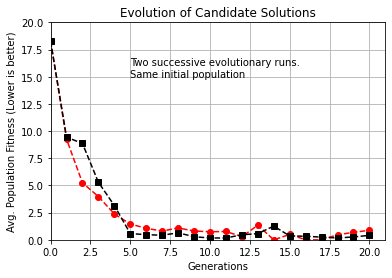

In [13]:
## Main
if  __name__ == '__main__':
	main()
# || END ||


 In each generation, the fitness(survival and reproductive success of an individual within an actual population) of every individual in the population is evaluated. Fitness of an individual reflects the effectiveness (loss or profit) due to the solution that is considered as an option. The more fit individuals are selected randomly from the current population and the genome of each individual is modified (with recombination or crossover and random mutation) to form a new generation.
The new generation of candidate solutions can be used in the next iteration of the algorithm. The algorithm concludes either when a maximum number of generations have been produced or when an adequate fitness level is reached for the population.

The process of evolution of the new generation is carried out by a loop that is executed the same number of times as the number of generations are indicated. In order to ultimately understand the effect of crossing over and mutations over the indicated number of generations, a graph is plotted with the values of serial numbers of generations along the x-axis and those of grades (based on average population fitness) along the y-axis. Although graphs with clearly different conformations are obtained from various trials (due to the stochasticity or randomness of the process both in nature and within the program), an overall pattern may be observed according to which better fitness values are seen towards the final generations.i.e.fitness values are observed to converge around a very minute value which is close to 0.

Due to the nature of the genetic algorithm of optimizing solutions to problems, the algorithm cannot be used to solve new problems though it can be used to find better solutions to an already existing problem. So, given the definition of a candlelight, it might create a more efficient lantern, but, it will never give you a fluorescent bulb.